### Censo Adultos (EDA) [exploracion de datos]

#### 1.- Librerías utilizadas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Crear graficos de tipo plot, barras, chart, pies
import seaborn as sns # Nos va a permitir agregar graficos
sns.set(style='darkgrid') # Grafico de tipo oscuro
%matplotlib inline

#### 2.- Carga y dimensión de datos

In [2]:
df_train = pd.read_csv('train_adultos.csv', sep=',')

In [3]:
#Obtener la dimensionalidad, es decir cuantas filas y columnas tiene el dataset
#Orden de lectura Filas y Columnas

df_train.shape

(32561, 15)

In [4]:
#El listado de nombres de las columnas
#El tipo de dato object, tiene el valor de un texto (char,varchar)
df_train.columns

Index(['age', 'work-class', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

Edad: este atributo nos informa sobre la edad de cualquier individuo. Es un atributo numérico con valores continuos, y dado que es una variable de intervalo donde la medición cero indica que no hay edad / cero.

WorkClass: este atributo nos informa sobre la clase de trabajo individual de cualquier individuo. Es un atributo categórico, con diferentes valores como privado, gobierno federal, gobierno local, gobierno estatal, etc. Es un atributo nominal ya que cada valor es distinto y tiene algún significado.

Educación: este atributo nos informa sobre el nivel educativo más alto de cualquier individuo. Es un atributo categórico, con diferentes valores como Bachillerato, Preescolar, Maestría, Doctorado, etc. Es un atributo nominal ya que cada valor es distinto y tiene algún significado.

Education-num: este atributo es una representación numérica del atributo de educación, que indica el nivel educativo más alto de cualquier individuo. Cuanto mayor sea el valor, mayor será el nivel educativo. Es un atributo ordinal ya que cada valor es distinto y tiene cierto orden, cuanto mayor sea el valor, mayor será el nivel educativo.

Estado civil: este atributo nos informa sobre el estado civil de un individuo. Es un atributo categórico, con diferentes valores como Casado-civil-cónyuge, Divorciado, Nunca casado, etc. Es un atributo nominal ya que cada valor es distinto y tiene algún significado.

Ocupación: este atributo nos informa sobre el campo de ocupación de un individuo. Es un atributo categórico, con diferentes valores como soporte técnico, reparación de artesanía, ventas, etc. Es un atributo nominal ya que cada valor es distinto y tiene algún significado.

Relación: este atributo nos informa sobre la relación del individuo en una familia. Es un atributo categórico, con diferentes valores como esposa, esposo, soltero, etc. Es un atributo nominal, ya que cada valor es distinto y tiene algún significado.

Raza: este atributo nos informa sobre la raza de un individuo. Es un atributo categórico, con diferentes valores como Blanco, Negro, Asiático-Pac-Islander, etc. Es un atributo nominal ya que cada valor es distinto y tiene algún significado.

Sexo: este atributo nos informa sobre el sexo / género de un individuo. Es un atributo categórico, con dos valores Masculino, Femenino. Es un atributo nominal ya que cada valor es distinto y tiene algún significado asociado.

Ganancia de capital: este atributo nos dice la ganancia / ingreso de fuentes de inversión distintas al salario. Es un atributo numérico con valores continuos, ya que es una variable de intervalo donde la medición cero significa que no hay ganancia de capital.

Pérdida de capital: este atributo nos dice la pérdida de fuentes de inversión distintas al salario. Es un atributo numérico con valores continuos, ya que es una variable de intervalo donde la medición cero significa que no hay pérdida de capital.

Horas por semana: este atributo nos dice la cantidad de horas que un individuo trabaja por semana. Es un atributo numérico con valores continuos, ya que es una variable de intervalo donde la medición cero significa que la persona no trabaja.

País nativo: este atributo nos informa sobre el país nativo / país de origen de un individuo. Es un atributo categórico con valores como Estados Unidos, India, Inglaterra, etc. Es un atributo nominal ya que cada valor es distinto y tiene algún significado.

Ingresos: este atributo nos informa sobre los ingresos de un individuo, ya sea menor que 50k o mayor que 50k. Es un valor categórico y un atributo nominal.

El enunciado del problema es predecir si el ingreso excede los 50 mil al año o no en función de los datos del censo

In [5]:
# TARGET = INCONE = INGRESOS
# Quiero crear un modelo de clasificaciones (1,0)
# Deseo predecir que personas en el futuro van a ganar <50K$ y/o van a ganar >50K$
df_train.head()

,age,work-class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
#Observar el detalle de valores únicos de mi variable target

## Unique, lo que hace es que nos devuelve los valores unicos
df_train['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [ ]:
# 1 = 0001
# 0 = 0000
# <=50k = 0001 1100 1010 1001 0011 0011 0001 1100 1010 1001 0011 0011 0001 1100 1010 1001 0011 0011

df_train.info()

La varibables income es nuestra variable target, por lo cual la cambiaremos por 0 y 1 para **facilitar el análisis**

In [7]:
#Modifico los valores de la variable dependiente y lo convierto a numérico
df_train['income'] = df_train['income'].replace(['<=50K'],'0')
df_train['income'] = df_train['income'].replace(['>50K'],'1')
df_train['income'] = df_train['income'].astype('int') ## Este atributo te permite cambiar el tipo de dato a entero.∫

In [8]:
df_train.head()

,age,work-class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [9]:
#Por si necesitas eliminar una variable que no debió estar considerada
# inplace = Indica al dataframe que si o si reemplace el valor.

df_train.drop(['fnlwgt'], axis=1, inplace=True)

In [10]:
df_train.head(3)

,age,work-class,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0


#### 3.- Entendimiento de datos

##### 3.1.- Valores nulos

In [11]:
#Visualizar el tipo de dato y la cantidad de registros que no son nulos
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   work-class      30725 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      30718 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  31978 non-null  object
 13  income          32561 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [12]:
#Visualizar las variables con datos nulos
#isna = nos permite saber cuantos valores estan en nulo por campo
# El el % de valores nulos superan el 10% se recomienda no considerar la variable.

df_train.isna().sum()

,0
age,0
work-class,1836
education,0
education-num,0
marital-status,0
occupation,1843
relationship,0
race,0
sex,0
capital-gain,0


Existen valores nules en las variables: Work-class, Occupatión y Native Country pero que no representán más del 6% del total de datos, igualmente analizaremos los campos nulos por si existe alguna relación entre las variables.

<Axes: >

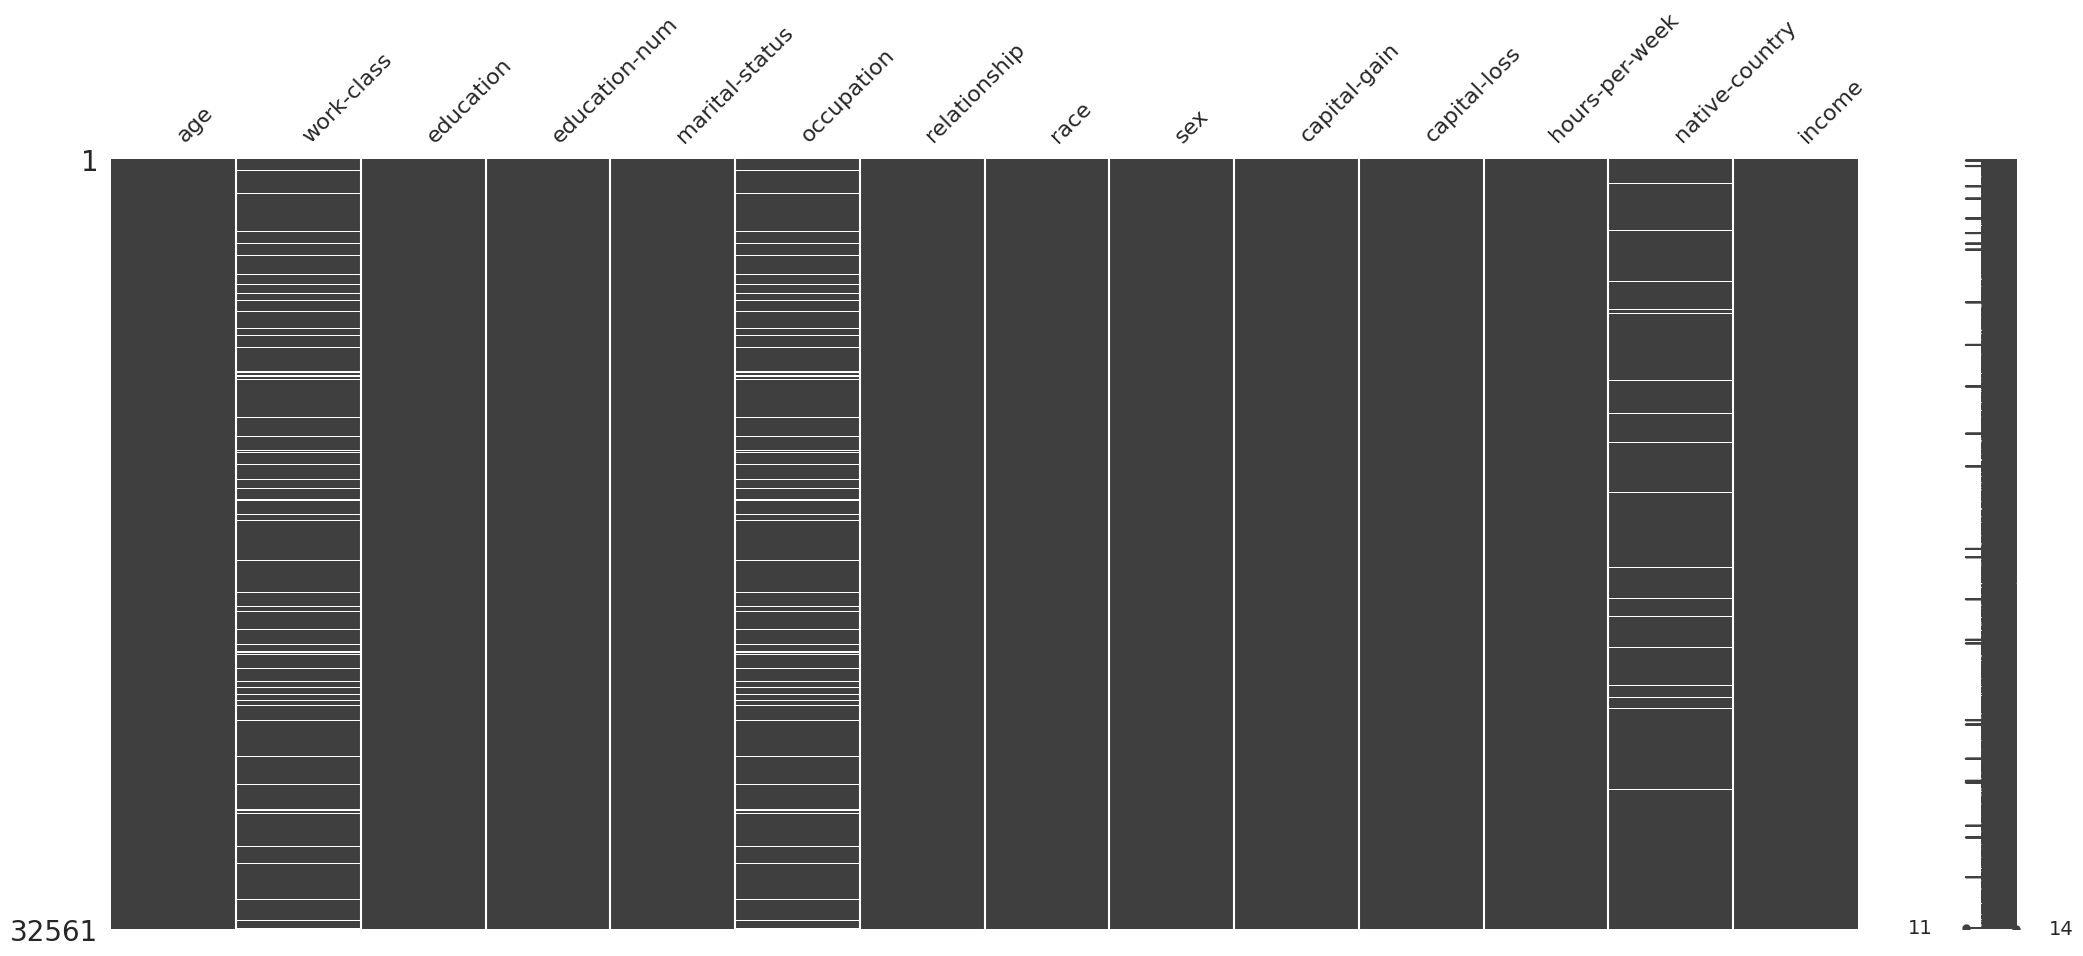

In [13]:
import missingno as msno

msno.matrix(df_train)

Podemos ver que en los casos donde figura un valor nulo en "Work Class", también se da para "Occupation", por lo que nos dice que la persona encuestada no tiene ocupación ni trabajo actual.

El campo de "Native Country" si parece un caso aislado.

##### 3.2.- Variable Target

,0
income,
0,24720
1,7841


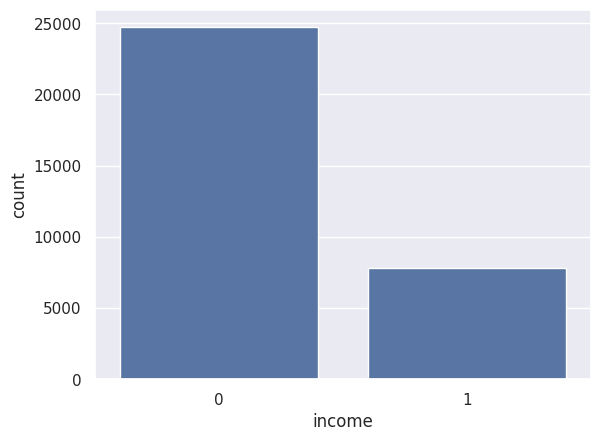

In [14]:
#sns.factorplot('income',data=df_train,kind="count")
# total de datos= 32,560
sns.countplot(data = df_train, x = "income")
df_train.groupby('income').size()

Aproximadamente el **24%** de personas encuestadas tiene un saldo por encima de los 50K mil dólares.

##### 3.3.- Variables cuantitativas

##### 3.3.1.- Medidas Estadísticas

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   work-class      30725 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      30718 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  31978 non-null  object
 13  income          32561 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [16]:
#Visualizar las principales estadísticas de las variables numéricas
## Solo variables numericas (campos de tipo enteros int)

df_train.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week,income
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


Analizamos las variables numéricas donde podemos observar que existen posibles valores atípicos en gran medida son "Capital-gain" y "Capital-loss" y en menor medida en "Age" y "Hours-per-week".

In [18]:
Variables = ['age', 'education-num','capital-gain', 'capital-loss', 'hours-per-week']

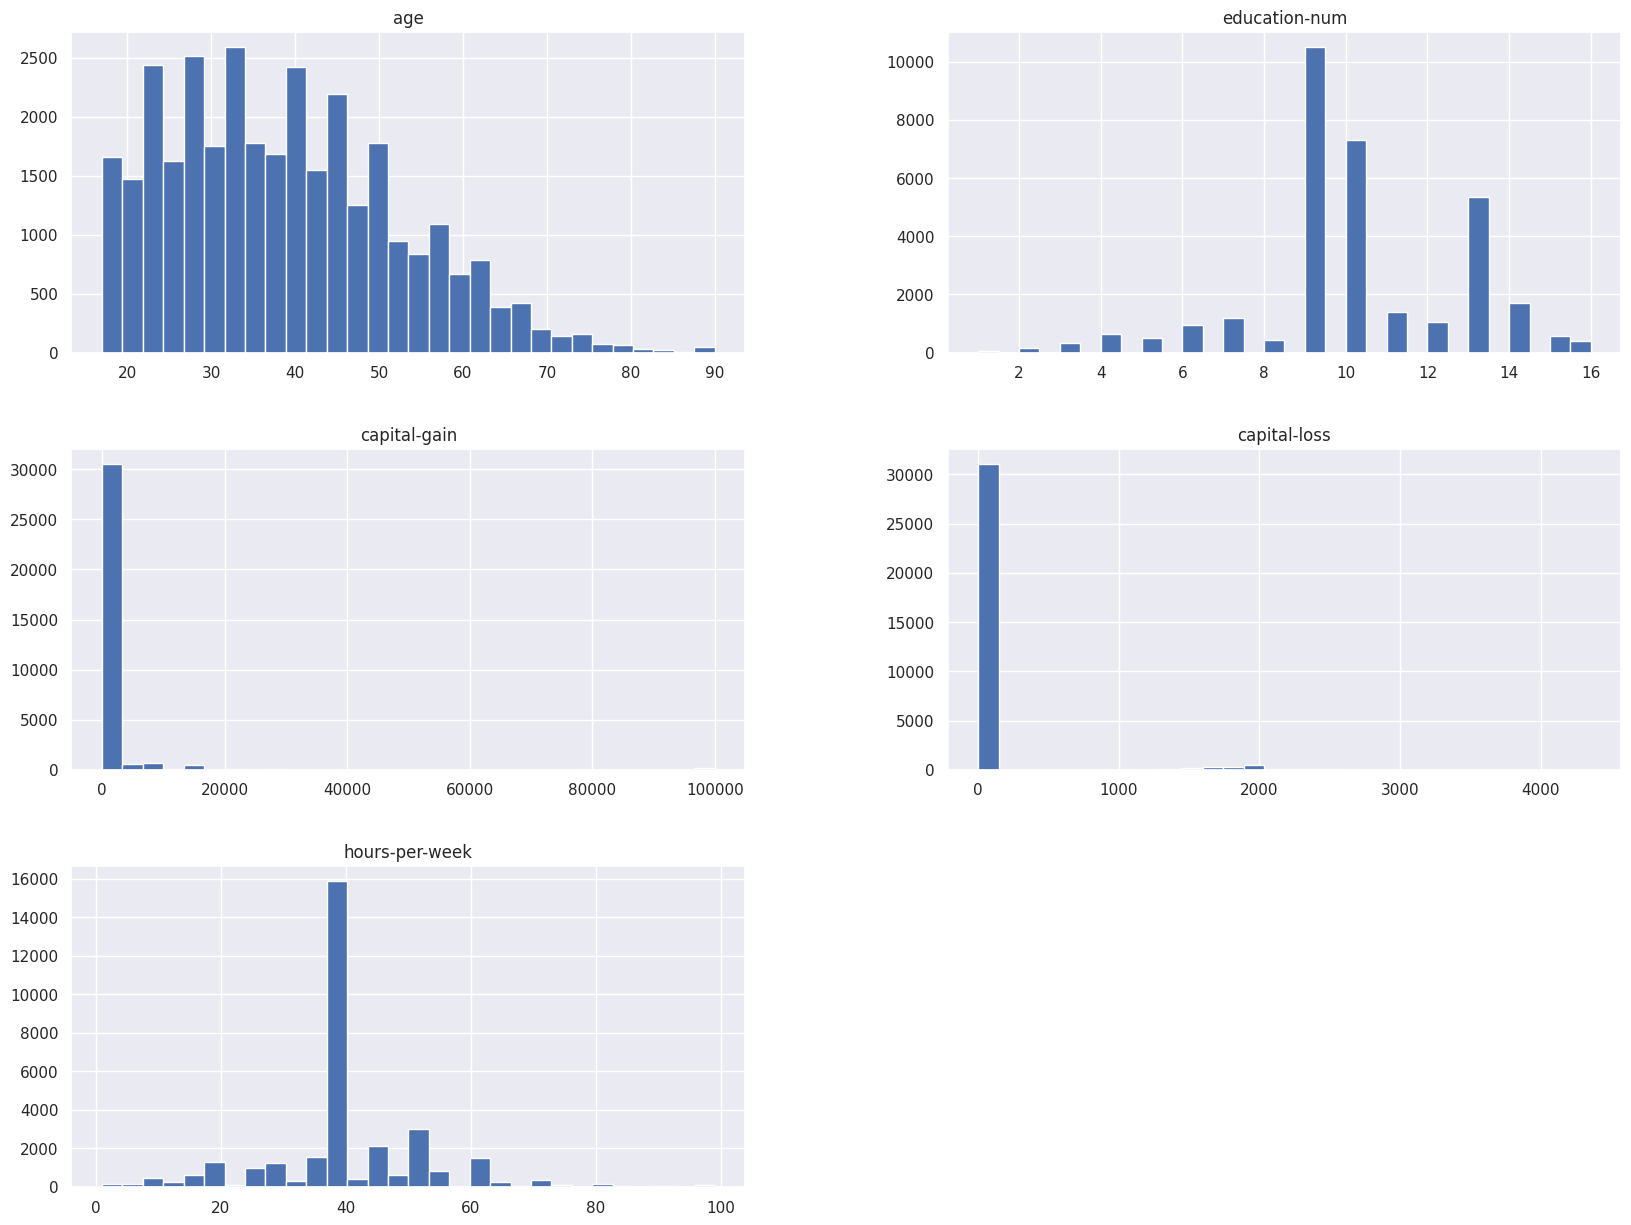

In [19]:
# bins = Numero de barras o intervalos (cuantas barras quieres que salgan como maximo)
# figsize = yamaño del grafico (ancho , largo)

df_train[Variables].hist(bins = 30, figsize=(20,15))
plt.show()

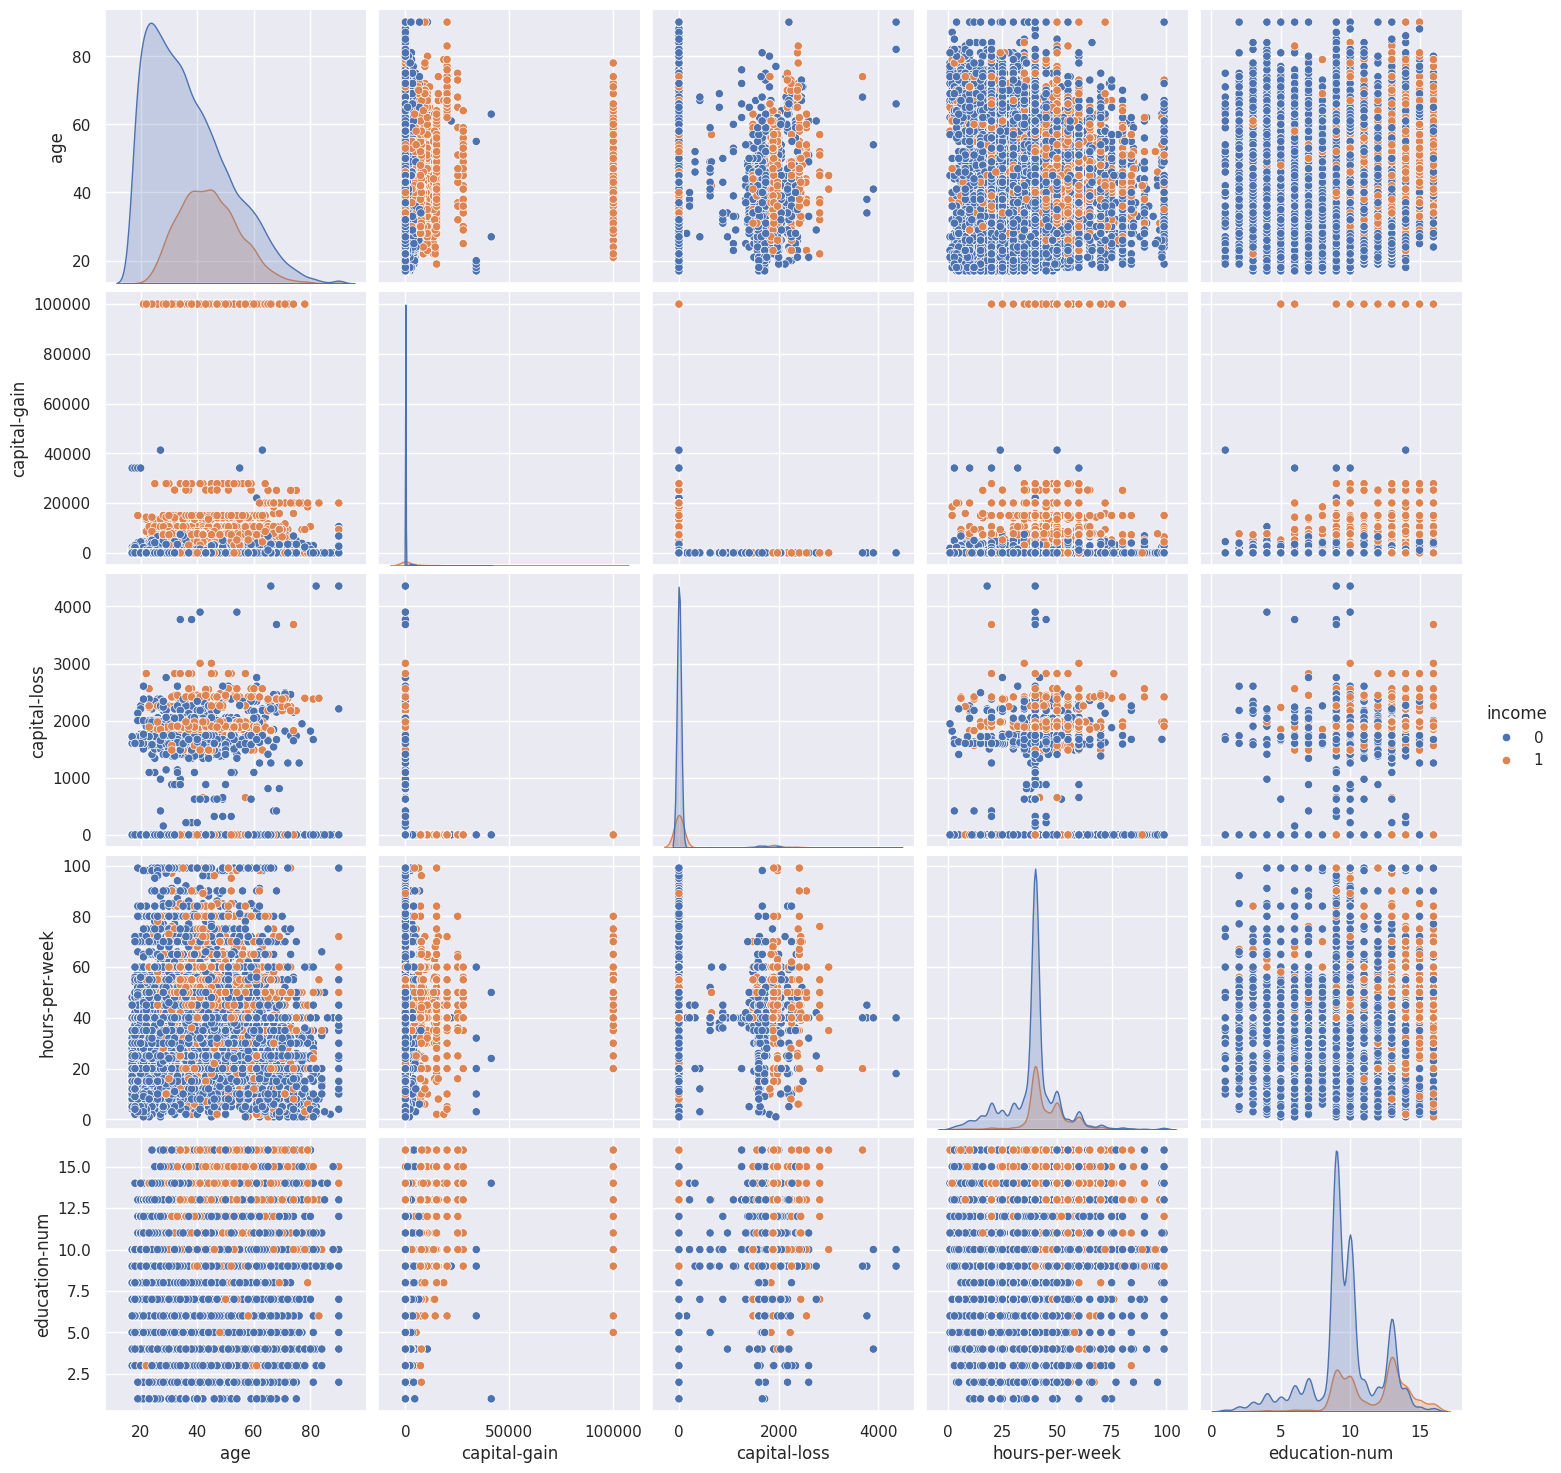

In [20]:
### Relacion que tienen las variables
## graficos de dispersion

### pairpilot -> grafico de dispersion.

Variables = ['age', 'capital-gain', 'capital-loss', 'hours-per-week','education-num','income']
## de este dataset, que ne la diagonal muestre distribuciiones. el HUE para que muestre el taget
sns.pairplot(df_train[Variables], height=3, diag_kind = 'kde', hue='income')

Cruzamos las variables numéricas entre ellas y adiconalmente agregamos el Target para conocer la distribución y comenzar a generar hipótesis de variables que discriminan mejor a ambos grupos (Mayor y menor sueldo a 50K).

##### 3.3.2.- Correlaciones

<Axes: >

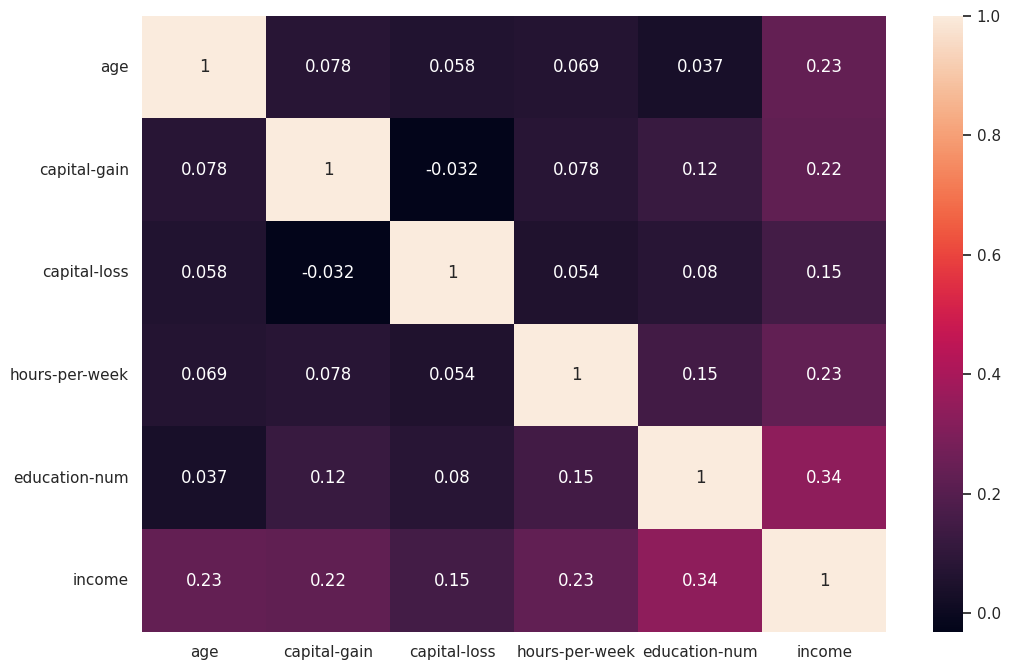

In [21]:
corr = df_train[['age', 'capital-gain', 'capital-loss', 'hours-per-week','education-num','income']].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)

La correlación se encuentra ente -0.1 y 0.1, muy cercano a 0 por lo que podemos decir que no presentan relación lineal entre ellas.

##### 3.4.- Variables cualitativas

Obtendremos las variables cualitativas para conocer su distribución y su relación con la variable "Target".

In [ ]:
df_train.info()

In [ ]:
### Nos quedamos con las variables que son de tipo object

categorical_attributes = df_train.select_dtypes(include=['object'])

In [ ]:
categorical_attributes.dtypes

##### 3.4.1.- Work Class (Tipo de Trabajo)

In [ ]:
#### Quiero saber cuanto me representa los datos de la variable workclass

plt.figure(figsize=(12,6))
sns.countplot(data = categorical_attributes, x = "work-class")
df_train['work-class'].value_counts(1).sort_index

El tipo de trabajo "Private" tiene el 74% de casos del total de observaciones.

In [ ]:
#sns.factorplot('income',data=df_train,hue='work-class',kind="count")

df_train[['work-class', 'income']].groupby(['work-class'], as_index=False).agg(['count','sum','mean'])

## % de personas que ganan mas de 50K es 24%

Los segmentos de "Work-Class" con mayor proporción de salarios mayor a 50K (1) es en "Self-emp-inc" y "Federal-gov".

##### 3.4.2.- Education (Educación)

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data = categorical_attributes, x = "education")
df_train['education'].value_counts(1).sort_index

El nivel de educación "HS-grad" cuenta con el 32% de observaciones, seguido con "Some-Collegue" con 22% aprox.

In [ ]:
sns.countplot(x='income',data=df_train,hue='education')
df_train[['education', 'income']].groupby(['education'], as_index=False).agg(['count','sum','mean'])
## Target 24%

Los niveles de "Education" con mayor proporción de salarios mayor a 50K (1) son "Prof-school", "Masters" y "Bachelors".

##### 3.4.3.- Sex (Género)

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data = categorical_attributes, x = "sex")
df_train['sex'].value_counts(1).sort_index

El género Masculino cuenta con el 67% de personas, es decir 2 de cada 3 personas son masculinos.

In [ ]:
sns.countplot(x='income',data=df_train,hue='sex')
df_train[['sex', 'income']].groupby(['sex'], as_index=False).agg(['count','sum','mean'])

El género Masculino tiene mayor proporción de salarios mayor a 50K (1) respecto al género femenino (30% vs 11%).